# SVM(Only Frequencies)

In [2]:
#Loading Required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score
import shap
from sklearn.inspection import permutation_importance

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
import numpy as np

from sklearn.metrics import mean_squared_error
warnings.filterwarnings('ignore')
from sklearn.ensemble import IsolationForest

## Using normal data to create SVM

For uniformity among the results we are using train and test set which are split previously.

In [23]:
X_train=pd.read_csv('Data/Normal/X_train.csv')
X_test=pd.read_csv('Data/Normal/X_test.csv')
y_test=pd.read_csv('Data/Normal/y_test.csv')
y_train=pd.read_csv('Data/Normal/y_train.csv')


Selecting only the frequencies  we got through feature selection using XG boost, As we found the other variables are overfitting the support vector machines


In [24]:

X_train=X_train[['f(408.4789)', 'f(2593.6791)', 'f(2378.4142)', 'f(2310.7054)', 'f(7127.1897)', 'f(865.5366)', 'f(6727.1713)', 'f(226.0000)', 'f(458.5020)', 'f(500.0000)', 'f(1029.3022)', 'f(5993.2283)', 'f(1887.7486)', 'f(1373.9536)', 'f(667.4199)', 'f(2747.9073)', 'f(1296.8396)', 'f(577.6763)', 'f(1155.3527)', 'f(1090.5077)']]
X_test=X_test[['f(408.4789)', 'f(2593.6791)', 'f(2378.4142)', 'f(2310.7054)', 'f(7127.1897)', 'f(865.5366)', 'f(6727.1713)', 'f(226.0000)', 'f(458.5020)', 'f(500.0000)', 'f(1029.3022)', 'f(5993.2283)', 'f(1887.7486)', 'f(1373.9536)', 'f(667.4199)', 'f(2747.9073)', 'f(1296.8396)', 'f(577.6763)', 'f(1155.3527)', 'f(1090.5077)']]

### Scaling

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

We found using min-max scaler was taking more into account the outliers. Using standard scaler instead for better results


# Grid Search

In [7]:
svm_linear = {'C': [0.1, 1, 10, 100, 1000], 
              'kernel': ['linear']} 
svm_others = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001,'auto'], 
              'kernel': ['poly', 'rbf', 'sigmoid']}

parameters = [svm_linear, svm_others]

  
grid = GridSearchCV(SVC(), param_grid=parameters, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)
# print best parameter after tuning 


Fitting 5 folds for each of 95 candidates, totalling 475 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.897 total time=   0.0s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.974 total time=   0.0s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.921 total time=   0.0s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.974 total time=   0.0s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.895 total time=   0.0s
[CV 1/5] END ................C=1, kernel=linear;, score=0.923 total time=   0.0s
[CV 2/5] END ................C=1, kernel=linear;, score=0.974 total time=   0.0s
[CV 3/5] END ................C=1, kernel=linear;, score=0.895 total time=   0.0s
[CV 4/5] END ................C=1, kernel=linear;, score=0.947 total time=   0.0s
[CV 5/5] END ................C=1, kernel=linear;, score=0.895 total time=   0.0s
[CV 1/5] END ...............C=10, kernel=linear;, score=0.923 total time=   0.0s
[CV 2/5] END ...............C=10, kernel=linear

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10, 100, 1000],
                          'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'auto'],
                          'kernel': ['poly', 'rbf', 'sigmoid']}],
             verbose=3)

In [8]:
print(grid.best_params_) 

{'C': 10, 'gamma': 0.01, 'kernel': 'sigmoid'}


In [26]:
#Create a svm Classifier

clf = svm.SVC(C=10,gamma =0.01,kernel='sigmoid',probability=True)

In [27]:
#Train the model using the training sets
clf.fit(X_train, y_train)
y_pred_tr=clf.predict(X_train)

print ("Accuracy score of training set:",round(accuracy_score(y_train, y_pred_tr),4))
print ("F1 Score of training set:",round(f1_score(y_train, y_pred_tr),4))
print ("Recall score of training set:",round(recall_score(y_train, y_pred_tr),4))
print ("Precision score of training set:",round(precision_score(y_train, y_pred_tr),4))




Accuracy score of training set: 0.9372
F1 Score of training set: 0.7857
Recall score of training set: 0.7333
Precision score of training set: 0.8462


In [28]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)
print ("Accuracy score of test set:",round(accuracy_score(y_test, y_pred),4))
print ("F1 Score of test set:",round(f1_score(y_test, y_pred),4))
print ("Recall score of test set:",round(recall_score(y_test, y_pred),4))
print ("Precision score of test set:",round(precision_score(y_test, y_pred),4))

Accuracy score of test set: 0.9375
F1 Score of test set: 0.8
Recall score of test set: 0.75
Precision score of test set: 0.8571


In [29]:
X_test = pd.DataFrame(X_test, columns=['f(408.4789)', 'f(2593.6791)', 'f(2378.4142)', 'f(2310.7054)', 'f(7127.1897)', 'f(865.5366)', 'f(6727.1713)', 'f(226.0000)', 'f(458.5020)', 'f(500.0000)', 'f(1029.3022)', 'f(5993.2283)', 'f(1887.7486)', 'f(1373.9536)', 'f(667.4199)', 'f(2747.9073)', 'f(1296.8396)', 'f(577.6763)', 'f(1155.3527)', 'f(1090.5077)'])
X_train = pd.DataFrame(X_train, columns=['f(408.4789)', 'f(2593.6791)', 'f(2378.4142)', 'f(2310.7054)', 'f(7127.1897)', 'f(865.5366)', 'f(6727.1713)', 'f(226.0000)', 'f(458.5020)', 'f(500.0000)', 'f(1029.3022)', 'f(5993.2283)', 'f(1887.7486)', 'f(1373.9536)', 'f(667.4199)', 'f(2747.9073)', 'f(1296.8396)', 'f(577.6763)', 'f(1155.3527)', 'f(1090.5077)'])

In [30]:
# explain all the predictions in the test set

#Force Plot for a single observation for a single class 0
shap.initjs() 
    # use Kernel SHAP to explain test set predictions
explainer = shap.KernelExplainer(clf.predict_proba, X_train, nsamples=100, link="logit")
shap_values = explainer.shap_values(X_test)
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test)

Using 191 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 48/48 [01:39<00:00,  2.08s/it]


In [26]:
#Force Plot for a single observation for a single class 1
shap.initjs()

shap.force_plot(explainer.expected_value[0], shap_values[0][0, :], X_test.iloc[0, :], link="logit")

Using 191 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 48/48 [01:41<00:00,  2.12s/it]


In [27]:
#Force Plot for a single observation for a single class 0
shap.initjs() 
    # use Kernel SHAP to explain test set predictions
explainer = shap.KernelExplainer(clf.predict_proba, X_train, nsamples=100, link="logit")
shap_values = explainer.shap_values(X_test)

shap.force_plot(explainer.expected_value[1], shap_values[1][0, :], X_test.iloc[0, :], link="logit")

Using 191 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 48/48 [01:40<00:00,  2.10s/it]


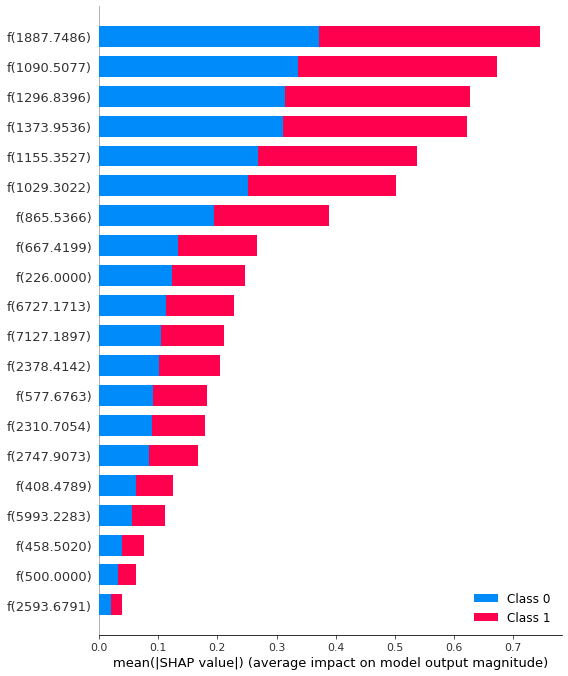

In [14]:
shap.initjs()
shap.summary_plot(shap_values, X_test)

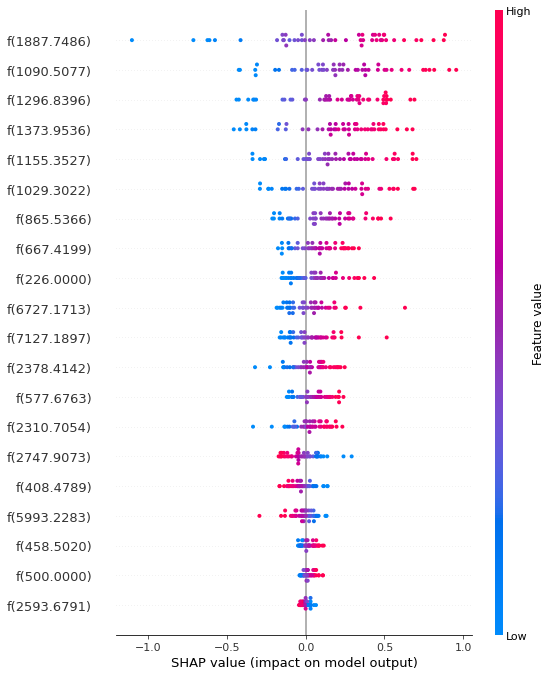

In [15]:
shap.initjs()
shap.summary_plot(shap_values[0], X_test)

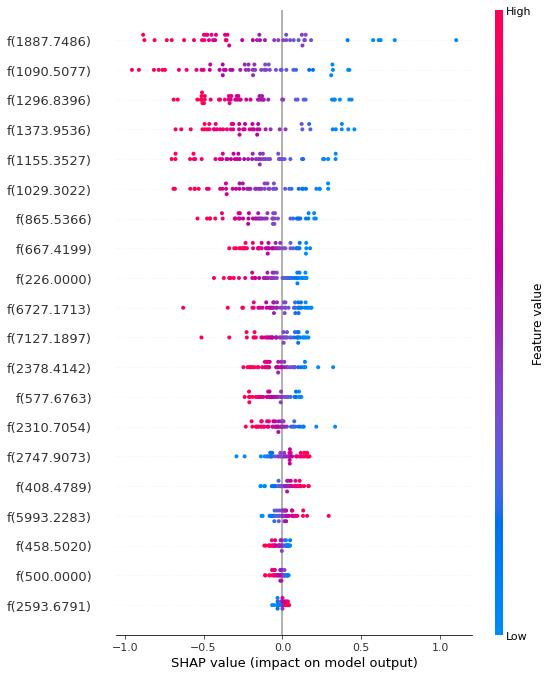

In [18]:
shap.initjs()
shap.summary_plot(shap_values[1], X_test)

## Using Data with Oversampling to create  SVM

In [3]:

X_train_over=pd.read_csv('Data/Oversampling/X_train_over.csv')
X_test_over=pd.read_csv('Data/Oversampling/X_test_over.csv')
y_test_over=pd.read_csv('Data/Oversampling/y_test_over.csv')
y_train_over=pd.read_csv('Data/Oversampling/y_train_over.csv')

In [4]:
X_train_over=X_train_over[['f(408.4789)', 'f(2593.6791)', 'f(2378.4142)', 'f(2310.7054)', 'f(7127.1897)', 'f(865.5366)', 'f(6727.1713)', 'f(226.0000)', 'f(458.5020)', 'f(500.0000)', 'f(1029.3022)', 'f(5993.2283)', 'f(1887.7486)', 'f(1373.9536)', 'f(667.4199)', 'f(2747.9073)', 'f(1296.8396)', 'f(577.6763)', 'f(1155.3527)', 'f(1090.5077)']]
X_test_over=X_test_over[['f(408.4789)', 'f(2593.6791)', 'f(2378.4142)', 'f(2310.7054)', 'f(7127.1897)', 'f(865.5366)', 'f(6727.1713)', 'f(226.0000)', 'f(458.5020)', 'f(500.0000)', 'f(1029.3022)', 'f(5993.2283)', 'f(1887.7486)', 'f(1373.9536)', 'f(667.4199)', 'f(2747.9073)', 'f(1296.8396)', 'f(577.6763)', 'f(1155.3527)', 'f(1090.5077)']]


### Scaling

In [5]:
scaler = StandardScaler()
X_train_over = scaler.fit_transform(X_train_over)
X_test_over = scaler.transform(X_test_over)

# Grid Search

In [7]:
svm_linear = {'C': [0.1, 1, 10, 100, 1000], 
              'kernel': ['linear']} 
svm_others = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001,'auto'], 
              'kernel': ['poly', 'rbf', 'sigmoid']}

parameters = [svm_linear, svm_others]

  
grid = GridSearchCV(SVC(), param_grid=parameters, refit = True, verbose = 3)
  
# fitting the model for grid search
print(grid.fit(X_train_over, y_train_over).best_params_)
# print best parameter after tuning 

Fitting 5 folds for each of 95 candidates, totalling 475 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.913 total time=   0.0s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.868 total time=   0.0s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.882 total time=   0.0s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.868 total time=   0.0s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.853 total time=   0.0s
[CV 1/5] END ................C=1, kernel=linear;, score=0.899 total time=   0.0s
[CV 2/5] END ................C=1, kernel=linear;, score=0.838 total time=   0.0s
[CV 3/5] END ................C=1, kernel=linear;, score=0.882 total time=   0.0s
[CV 4/5] END ................C=1, kernel=linear;, score=0.853 total time=   0.0s
[CV 5/5] END ................C=1, kernel=linear;, score=0.868 total time=   0.0s
[CV 1/5] END ...............C=10, kernel=linear;, score=0.884 total time=   0.0s
[CV 2/5] END ...............C=10, kernel=linear

In [8]:
print(grid.best_params_)  

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [9]:
clf = svm.SVC(C=1,gamma=1,kernel='rbf',probability=True)

In [10]:
#Train the model using the training sets
clf.fit(X_train_over, y_train_over)


y_pred_tr=clf.predict(X_train_over)
print ("Accuracy score of training set:",round(accuracy_score(y_train_over, y_pred_tr),4))
print ("F1 Score of training set:",round(f1_score(y_train_over, y_pred_tr),4))
print ("Recall score of training set:",round(recall_score(y_train_over, y_pred_tr),4))
print ("Precision score of training set:",round(precision_score(y_train_over, y_pred_tr),4))




Accuracy score of training set: 1.0
F1 Score of training set: 1.0
Recall score of training set: 1.0
Precision score of training set: 1.0


In [11]:
#Predict the response for test dataset
y_pred_over = clf.predict(X_test_over)
print ("Accuracy score of test set:",round(accuracy_score(y_test_over, y_pred_over),4))
print ("F1 Score of test set:",round(f1_score(y_test_over, y_pred_over),4))
print ("Recall score of test set:",round(recall_score(y_test_over, y_pred_over),4))
print ("Precision score of test set:",round(precision_score(y_test_over, y_pred_over),4))


Accuracy score of test set: 0.9672
F1 Score of test set: 0.9655
Recall score of test set: 0.9333
Precision score of test set: 1.0


Text(0.5, 0, 'Permutation Importance')

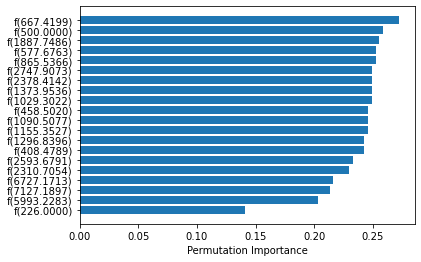

In [12]:
perm_importance = permutation_importance(clf, X_test_over, y_test_over)

feature_names = ['f(408.4789)', 'f(2593.6791)', 'f(2378.4142)', 'f(2310.7054)', 'f(7127.1897)', 'f(865.5366)', 'f(6727.1713)', 'f(226.0000)', 'f(458.5020)', 'f(500.0000)', 'f(1029.3022)', 'f(5993.2283)', 'f(1887.7486)', 'f(1373.9536)', 'f(667.4199)', 'f(2747.9073)', 'f(1296.8396)', 'f(577.6763)', 'f(1155.3527)', 'f(1090.5077)']
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")


In [13]:
X_test_over = pd.DataFrame(X_test_over, columns=['f(408.4789)', 'f(2593.6791)', 'f(2378.4142)', 'f(2310.7054)', 'f(7127.1897)', 'f(865.5366)', 'f(6727.1713)', 'f(226.0000)', 'f(458.5020)', 'f(500.0000)', 'f(1029.3022)', 'f(5993.2283)', 'f(1887.7486)', 'f(1373.9536)', 'f(667.4199)', 'f(2747.9073)', 'f(1296.8396)', 'f(577.6763)', 'f(1155.3527)', 'f(1090.5077)'])
X_train_over = pd.DataFrame(X_train_over, columns=['f(408.4789)', 'f(2593.6791)', 'f(2378.4142)', 'f(2310.7054)', 'f(7127.1897)', 'f(865.5366)', 'f(6727.1713)', 'f(226.0000)', 'f(458.5020)', 'f(500.0000)', 'f(1029.3022)', 'f(5993.2283)', 'f(1887.7486)', 'f(1373.9536)', 'f(667.4199)', 'f(2747.9073)', 'f(1296.8396)', 'f(577.6763)', 'f(1155.3527)', 'f(1090.5077)'])

In [17]:
# explain all the predictions in the test set

shap.initjs() 
    # use Kernel SHAP to explain test set predictions
explainer = shap.KernelExplainer(clf.predict_proba, X_train_over, nsamples=100, link="logit")

shap_values = explainer.shap_values(X_test_over)
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test_over)

Using 341 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 61/61 [18:13<00:00, 17.93s/it]


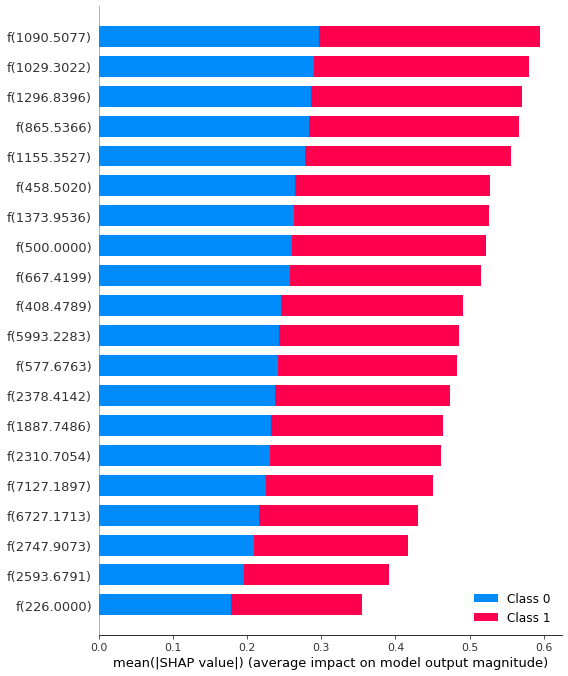

In [18]:
shap.initjs()
shap.summary_plot(shap_values, X_test_over)

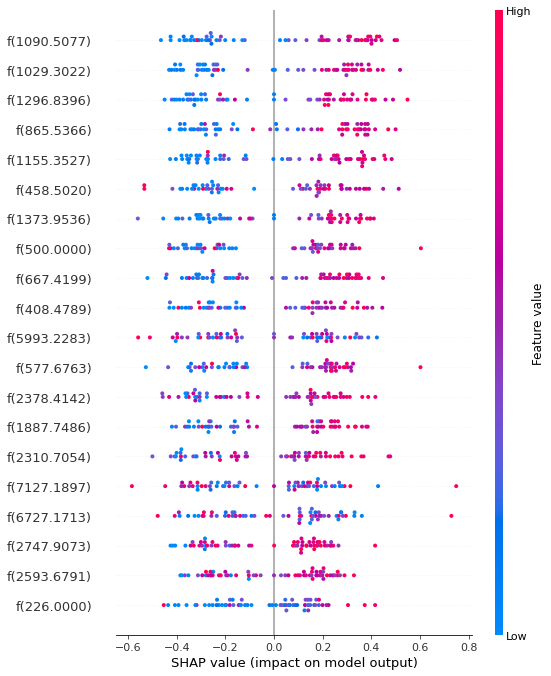

In [19]:
shap.initjs()
shap.summary_plot(shap_values[0], X_test_over)

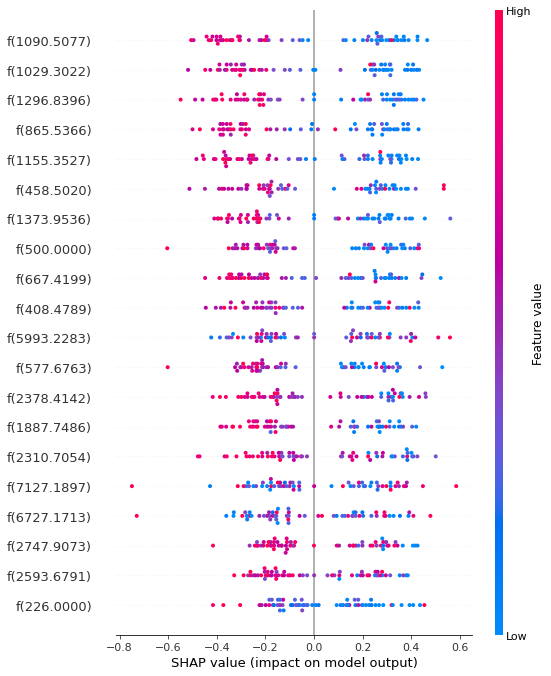

In [20]:
shap.initjs()
shap.summary_plot(shap_values[1], X_test_over)

## Using Adasyn Large data to create  SVM

In [86]:

X_train_adasyn=pd.read_csv('Data/Adasyn Large/X_train_adasyn.csv')
X_test_adasyn=pd.read_csv('Data/Adasyn Large/X_test_adasyn.csv')
y_test_adasyn=pd.read_csv('Data/Adasyn Large/y_test_adasyn.csv')
y_train_adasyn=pd.read_csv('Data/Adasyn Large/y_train_adasyn.csv')

In [87]:
X_train_adasyn=X_train_adasyn[['f(408.4789)', 'f(2593.6791)', 'f(2378.4142)', 'f(2310.7054)', 'f(7127.1897)', 'f(865.5366)', 'f(6727.1713)', 'f(226.0000)', 'f(458.5020)', 'f(500.0000)', 'f(1029.3022)', 'f(5993.2283)', 'f(1887.7486)', 'f(1373.9536)', 'f(667.4199)', 'f(2747.9073)', 'f(1296.8396)', 'f(577.6763)', 'f(1155.3527)', 'f(1090.5077)']]
X_test_adasyn=X_test_adasyn[['f(408.4789)', 'f(2593.6791)', 'f(2378.4142)', 'f(2310.7054)', 'f(7127.1897)', 'f(865.5366)', 'f(6727.1713)', 'f(226.0000)', 'f(458.5020)', 'f(500.0000)', 'f(1029.3022)', 'f(5993.2283)', 'f(1887.7486)', 'f(1373.9536)', 'f(667.4199)', 'f(2747.9073)', 'f(1296.8396)', 'f(577.6763)', 'f(1155.3527)', 'f(1090.5077)']]


In [88]:
scaler = StandardScaler()
X_train_adasyn = scaler.fit_transform(X_train_adasyn)
X_test_adasyn = scaler.transform(X_test_adasyn)

In [84]:

svm_others = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001,'auto'], 
              'kernel': ['poly', 'rbf', 'sigmoid']}


  
grid = GridSearchCV(SVC(), param_grid=svm_others, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train_adasyn, y_train_adasyn)


Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.995 total time=   0.4s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.995 total time=   0.3s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.994 total time=   0.4s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.995 total time=   0.3s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.993 total time=   0.3s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.997 total time=   1.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.996 total time=   1.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.998 total time=   1.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.996 total time=   1.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.997 total time=   1.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.398 total time=   1.9s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'auto'],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             verbose=3)

In [85]:
# print best parameter after tuning 
print(grid.best_params_) 

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [89]:
clf = svm.SVC(C=10,gamma=0.1,kernel='rbf',probability=True)
#Train the model using the training sets
clf.fit(X_train_adasyn, y_train_adasyn)
y_pred_tr=clf.predict(X_train_adasyn)
print ("Accuracy score of training set:",round(accuracy_score(y_train_adasyn, y_pred_tr),4))
print ("F1 Score of training set:",round(f1_score(y_train_adasyn, y_pred_tr),4))
print ("Recall score of training set:",round(recall_score(y_train_adasyn, y_pred_tr),4))
print ("Precision score of training set:",round(precision_score(y_train_adasyn, y_pred_tr),4))




Accuracy score of training set: 0.9996
F1 Score of training set: 0.9996
Recall score of training set: 1.0
Precision score of training set: 0.9993


In [90]:

#Predict the response for test dataset
y_pred_adasyn= clf.predict(X_test_adasyn)
print ("Accuracy score of test set:",round(accuracy_score(y_test_adasyn, y_pred_adasyn),4))
print ("F1 Score of test set:",round(f1_score(y_test_adasyn, y_pred_adasyn),4))
print ("Recall score of test set:",round(recall_score(y_test_adasyn, y_pred_adasyn),4))
print ("Precision score of test set:",round(precision_score(y_test_adasyn, y_pred_adasyn),4))

Accuracy score of test set: 0.9967
F1 Score of test set: 0.9967
Recall score of test set: 1.0
Precision score of test set: 0.9934


Text(0.5, 0, 'Permutation Importance')

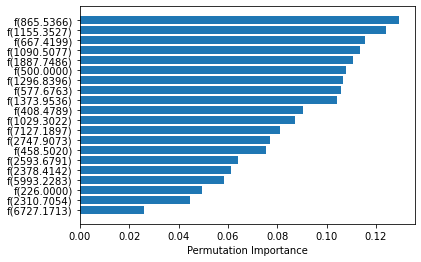

In [91]:
perm_importance = permutation_importance(clf, X_test_adasyn, y_test_adasyn)

feature_names = ['f(408.4789)', 'f(2593.6791)', 'f(2378.4142)', 'f(2310.7054)', 'f(7127.1897)', 'f(865.5366)', 'f(6727.1713)', 'f(226.0000)', 'f(458.5020)', 'f(500.0000)', 'f(1029.3022)', 'f(5993.2283)', 'f(1887.7486)', 'f(1373.9536)', 'f(667.4199)', 'f(2747.9073)', 'f(1296.8396)', 'f(577.6763)', 'f(1155.3527)', 'f(1090.5077)']
features = np.array(feature_names)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

## Using Smote data to create  SVM

In [27]:

X_train_smote=pd.read_csv('Data/Smote/X_train_smote.csv')
X_test_smote=pd.read_csv('Data/Smote/X_test_smote.csv')
y_test_smote=pd.read_csv('Data/Smote/y_test_smote.csv')
y_train_smote=pd.read_csv('Data/Smote/y_train_smote.csv')

In [28]:
X_train_smote=X_train_smote[['f(408.4789)', 'f(2593.6791)', 'f(2378.4142)', 'f(2310.7054)', 'f(7127.1897)', 'f(865.5366)', 'f(6727.1713)', 'f(226.0000)', 'f(458.5020)', 'f(500.0000)', 'f(1029.3022)', 'f(5993.2283)', 'f(1887.7486)', 'f(1373.9536)', 'f(667.4199)', 'f(2747.9073)', 'f(1296.8396)', 'f(577.6763)', 'f(1155.3527)', 'f(1090.5077)']]
X_test_smote=X_test_smote[['f(408.4789)', 'f(2593.6791)', 'f(2378.4142)', 'f(2310.7054)', 'f(7127.1897)', 'f(865.5366)', 'f(6727.1713)', 'f(226.0000)', 'f(458.5020)', 'f(500.0000)', 'f(1029.3022)', 'f(5993.2283)', 'f(1887.7486)', 'f(1373.9536)', 'f(667.4199)', 'f(2747.9073)', 'f(1296.8396)', 'f(577.6763)', 'f(1155.3527)', 'f(1090.5077)']]


In [29]:
y_test_smote=y_test_smote.iloc[:,1:]
y_train_smote=y_train_smote.iloc[:,1:]


In [30]:
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test_smote = scaler.transform(X_test_smote)

In [31]:
svm_linear = {'C': [0.1, 1, 10, 100, 1000], 
              'kernel': ['linear']} 
svm_others = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001,'auto'], 
              'kernel': ['poly', 'rbf', 'sigmoid']}

parameters = [svm_linear, svm_others]

  
grid = GridSearchCV(SVC(), param_grid=parameters, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 95 candidates, totalling 475 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.928 total time=   0.0s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.897 total time=   0.0s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.868 total time=   0.0s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.868 total time=   0.0s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.824 total time=   0.0s
[CV 1/5] END ................C=1, kernel=linear;, score=0.913 total time=   0.0s
[CV 2/5] END ................C=1, kernel=linear;, score=0.882 total time=   0.0s
[CV 3/5] END ................C=1, kernel=linear;, score=0.912 total time=   0.0s
[CV 4/5] END ................C=1, kernel=linear;, score=0.882 total time=   0.0s
[CV 5/5] END ................C=1, kernel=linear;, score=0.824 total time=   0.0s
[CV 1/5] END ...............C=10, kernel=linear;, score=0.928 total time=   0.0s
[CV 2/5] END ...............C=10, kernel=linear

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10, 100, 1000],
                          'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'auto'],
                          'kernel': ['poly', 'rbf', 'sigmoid']}],
             verbose=3)

In [32]:
print(grid.best_params_) 

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [33]:
clf = svm.SVC(C=10,gamma=1,kernel='rbf',probability=True)
#Train the model using the training sets
clf.fit(X_train_smote, y_train_smote)
y_pred_tr=clf.predict(X_train_smote)
print ("Accuracy score of training set:",round(accuracy_score(y_train_smote, y_pred_tr),4))
print ("F1 Score of training set:",round(f1_score(y_train_smote, y_pred_tr),4))
print ("Recall score of training set:",round(recall_score(y_train_smote, y_pred_tr),4))
print ("Precision score of training set:",round(precision_score(y_train_smote, y_pred_tr),4))




Accuracy score of training set: 1.0
F1 Score of training set: 1.0
Recall score of training set: 1.0
Precision score of training set: 1.0


In [34]:
#Predict the response for test dataset
y_pred_smote= clf.predict(X_test_smote)
print ("Accuracy score of test set:",round(accuracy_score(y_test_smote, y_pred_smote),4))
print ("F1 Score of test set:",round(f1_score(y_test_smote, y_pred_smote),4))
print ("Recall score of test set:",round(recall_score(y_test_smote, y_pred_smote),4))
print ("Precision score of test set:",round(precision_score(y_test_smote, y_pred_smote),4))

Accuracy score of test set: 0.9836
F1 Score of test set: 0.9831
Recall score of test set: 0.9667
Precision score of test set: 1.0


In [36]:
X_test_smote = pd.DataFrame(X_test_smote, columns=['f(408.4789)', 'f(2593.6791)', 'f(2378.4142)', 'f(2310.7054)', 'f(7127.1897)', 'f(865.5366)', 'f(6727.1713)', 'f(226.0000)', 'f(458.5020)', 'f(500.0000)', 'f(1029.3022)', 'f(5993.2283)', 'f(1887.7486)', 'f(1373.9536)', 'f(667.4199)', 'f(2747.9073)', 'f(1296.8396)', 'f(577.6763)', 'f(1155.3527)', 'f(1090.5077)'])
X_train_smote = pd.DataFrame(X_train_smote, columns=['f(408.4789)', 'f(2593.6791)', 'f(2378.4142)', 'f(2310.7054)', 'f(7127.1897)', 'f(865.5366)', 'f(6727.1713)', 'f(226.0000)', 'f(458.5020)', 'f(500.0000)', 'f(1029.3022)', 'f(5993.2283)', 'f(1887.7486)', 'f(1373.9536)', 'f(667.4199)', 'f(2747.9073)', 'f(1296.8396)', 'f(577.6763)', 'f(1155.3527)', 'f(1090.5077)'])

In [37]:
shap.initjs() 
    # use Kernel SHAP to explain test set predictions
explainer = shap.KernelExplainer(clf.predict_proba, X_train_smote, nsamples=100, link="logit")
shap_values = explainer.shap_values(X_test_smote)

shap.force_plot(explainer.expected_value[0], shap_values[0][0, :], X_test_smote.iloc[0, :], link="logit")

Using 341 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 61/61 [1:19:09<00:00, 77.86s/it] 


In [ ]:
shap.initjs()
shap.summary_plot(shap_values, X_test_smote)

In [ ]:
shap.initjs()
shap.summary_plot(shap_values[0], X_test_smote)

## Using Smote large data to create  SVM

In [43]:
X_train_smotelg=pd.read_csv('Data/Smote Large/X_train_smote.csv')
X_test_smotelg=pd.read_csv('Data/Smote Large/X_test_smote.csv')
y_test_smotelg=pd.read_csv('Data/Smote Large/y_test_smote.csv')
y_train_smotelg=pd.read_csv('Data/Smote Large/y_train_smote.csv')

In [44]:
X_train_smotelg=X_train_smotelg[['f(408.4789)', 'f(2593.6791)', 'f(2378.4142)', 'f(2310.7054)', 'f(7127.1897)', 'f(865.5366)', 'f(6727.1713)', 'f(226.0000)', 'f(458.5020)', 'f(500.0000)', 'f(1029.3022)', 'f(5993.2283)', 'f(1887.7486)', 'f(1373.9536)', 'f(667.4199)', 'f(2747.9073)', 'f(1296.8396)', 'f(577.6763)', 'f(1155.3527)', 'f(1090.5077)']]
X_test_smotelg=X_test_smotelg[['f(408.4789)', 'f(2593.6791)', 'f(2378.4142)', 'f(2310.7054)', 'f(7127.1897)', 'f(865.5366)', 'f(6727.1713)', 'f(226.0000)', 'f(458.5020)', 'f(500.0000)', 'f(1029.3022)', 'f(5993.2283)', 'f(1887.7486)', 'f(1373.9536)', 'f(667.4199)', 'f(2747.9073)', 'f(1296.8396)', 'f(577.6763)', 'f(1155.3527)', 'f(1090.5077)']]


In [47]:
y_test_smotelg=y_test_smotelg.iloc[:,1:]
y_train_smotelg=y_train_smotelg.iloc[:,1:]

In [45]:
scaler = StandardScaler()
X_train_smotelg = scaler.fit_transform(X_train_smotelg)
X_test_smotelg = scaler.transform(X_test_smotelg)

In [369]:
svm_linear = {'C': [0.1, 1, 10, 100, 1000], 
              'kernel': ['linear']} 
svm_others = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001,'auto'], 
              'kernel': ['poly', 'rbf', 'sigmoid']}

parameters = [svm_linear, svm_others]

  
grid = GridSearchCV(SVC(), param_grid=parameters, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train_smotelg, y_train_smotelg)

Fitting 5 folds for each of 95 candidates, totalling 475 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.995 total time=   0.7s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.991 total time=   0.2s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.989 total time=   0.2s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.994 total time=   0.2s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.992 total time=   0.2s
[CV 1/5] END ................C=1, kernel=linear;, score=0.996 total time=   0.1s
[CV 2/5] END ................C=1, kernel=linear;, score=0.995 total time=   0.1s
[CV 3/5] END ................C=1, kernel=linear;, score=0.994 total time=   0.1s
[CV 4/5] END ................C=1, kernel=linear;, score=0.996 total time=   0.1s
[CV 5/5] END ................C=1, kernel=linear;, score=0.995 total time=   0.1s
[CV 1/5] END ...............C=10, kernel=linear;, score=0.999 total time=   0.1s
[CV 2/5] END ...............C=10, kernel=linear

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10, 100, 1000],
                          'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'auto'],
                          'kernel': ['poly', 'rbf', 'sigmoid']}],
             verbose=3)

In [41]:
print(grid.best_params_) 

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}


In [48]:
clf = svm.SVC(C=100,gamma=1,kernel='rbf')
#Train the model using the training sets
clf.fit(X_train_smotelg, y_train_smotelg)

#Predict the response for test dataset
y_pred_smotelg= clf.predict(X_test_smotelg)


In [373]:
print(classification_report(y_test_smotelg, y_pred_smotelg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       750
           1       1.00      1.00      1.00       750

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



## Using Svm Smote Large data to create  SVM

In [374]:
X_train_smotesvm=pd.read_csv('Data/Svm Smote Large/X_train_svmsmote.csv')
X_test_smotesvm=pd.read_csv('Data/Svm Smote Large/X_test_svmsmote.csv')
y_test_smotesvm=pd.read_csv('Data/Svm Smote Large/y_test_svmsmote.csv')
y_train_smotesvm=pd.read_csv('Data/Svm Smote Large/y_train_svmsmote.csv')

In [375]:
X_train_smotesvm=X_train_smotesvm[['f(408.4789)', 'f(2593.6791)', 'f(2378.4142)', 'f(2310.7054)', 'f(7127.1897)', 'f(865.5366)', 'f(6727.1713)', 'f(226.0000)', 'f(458.5020)', 'f(500.0000)', 'f(1029.3022)', 'f(5993.2283)', 'f(1887.7486)', 'f(1373.9536)', 'f(667.4199)', 'f(2747.9073)', 'f(1296.8396)', 'f(577.6763)', 'f(1155.3527)', 'f(1090.5077)']]
X_test_smotesvm=X_test_smotesvm[['f(408.4789)', 'f(2593.6791)', 'f(2378.4142)', 'f(2310.7054)', 'f(7127.1897)', 'f(865.5366)', 'f(6727.1713)', 'f(226.0000)', 'f(458.5020)', 'f(500.0000)', 'f(1029.3022)', 'f(5993.2283)', 'f(1887.7486)', 'f(1373.9536)', 'f(667.4199)', 'f(2747.9073)', 'f(1296.8396)', 'f(577.6763)', 'f(1155.3527)', 'f(1090.5077)']]


In [376]:
y_test_smotesvm=y_test_smotesvm.iloc[:,1:]
y_train_smotesvm=y_train_smotesvm.iloc[:,1:]


In [377]:
scaler = StandardScaler()
X_train_smotesvm = scaler.fit_transform(X_train_smotesvm)
X_test_smotesvm = scaler.transform(X_test_smotesvm)

In [378]:
svm_linear = {'C': [0.1, 1, 10, 100, 1000], 
              'kernel': ['linear']} 
svm_others = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001,'auto'], 
              'kernel': ['poly', 'rbf', 'sigmoid']}

parameters = [svm_linear, svm_others]

  
grid = GridSearchCV(SVC(), param_grid=parameters, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train_smotesvm, y_train_smotesvm)

Fitting 5 folds for each of 95 candidates, totalling 475 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.956 total time=   0.8s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.955 total time=   0.4s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.946 total time=   0.4s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.956 total time=   0.4s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.968 total time=   0.4s
[CV 1/5] END ................C=1, kernel=linear;, score=0.987 total time=   0.2s
[CV 2/5] END ................C=1, kernel=linear;, score=0.996 total time=   0.2s
[CV 3/5] END ................C=1, kernel=linear;, score=0.987 total time=   0.2s
[CV 4/5] END ................C=1, kernel=linear;, score=0.988 total time=   0.2s
[CV 5/5] END ................C=1, kernel=linear;, score=0.992 total time=   0.2s
[CV 1/5] END ...............C=10, kernel=linear;, score=0.992 total time=   0.1s
[CV 2/5] END ...............C=10, kernel=linear

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10, 100, 1000],
                          'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'auto'],
                          'kernel': ['poly', 'rbf', 'sigmoid']}],
             verbose=3)

In [379]:
print(grid.best_params_) 

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [381]:
clf = svm.SVC(C=10,gamma=1,kernel='rbf')
#Train the model using the training sets
clf.fit(X_train_smotesvm, y_train_smotesvm)

#Predict the response for test dataset
y_pred_smotesvm= clf.predict(X_test_smotesvm)

In [382]:
print(classification_report(y_test_smotesvm, y_pred_smotesvm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       692
           1       1.00      1.00      1.00       750

    accuracy                           1.00      1442
   macro avg       1.00      1.00      1.00      1442
weighted avg       1.00      1.00      1.00      1442



# Creating SVM using VAE dataset

In [35]:
X_train_vae=pd.read_csv('Data/VAE/X_gen_train.csv')
X_test_vae=pd.read_csv('Data/VAE/X_gen_test.csv')
y_test_vae=pd.read_csv('Data/VAE/y_gen_test.csv')
y_train_vae=pd.read_csv('Data/VAE/y_gen_train.csv')

In [36]:
X_train_vae=X_train_vae[['f(408.4789)', 'f(2593.6791)', 'f(2378.4142)', 'f(2310.7054)', 'f(7127.1897)', 'f(865.5366)', 'f(6727.1713)', 'f(226.0000)', 'f(458.5020)', 'f(500.0000)', 'f(1029.3022)', 'f(5993.2283)', 'f(1887.7486)', 'f(1373.9536)', 'f(667.4199)', 'f(2747.9073)', 'f(1296.8396)', 'f(577.6763)', 'f(1155.3527)', 'f(1090.5077)']]
X_test_vae=X_test_vae[['f(408.4789)', 'f(2593.6791)', 'f(2378.4142)', 'f(2310.7054)', 'f(7127.1897)', 'f(865.5366)', 'f(6727.1713)', 'f(226.0000)', 'f(458.5020)', 'f(500.0000)', 'f(1029.3022)', 'f(5993.2283)', 'f(1887.7486)', 'f(1373.9536)', 'f(667.4199)', 'f(2747.9073)', 'f(1296.8396)', 'f(577.6763)', 'f(1155.3527)', 'f(1090.5077)']]
y_test_vae=y_test_vae.iloc[:,1:]
y_train_vae=y_train_vae.iloc[:,1:]


In [38]:
scaler = StandardScaler()
X_train_vae = scaler.fit_transform(X_train_vae)
X_test_vae = scaler.transform(X_test_vae)

In [40]:

svm_others = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001,'auto'], 
              'kernel': ['poly', 'rbf', 'sigmoid']}

  
grid = GridSearchCV(SVC(), param_grid=svm_others, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train_vae,y_train_vae)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.963 total time=   5.6s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.973 total time=   6.7s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.976 total time=   6.9s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.974 total time=   6.4s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.970 total time=   6.4s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.960 total time=   9.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.964 total time=   9.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.968 total time=   9.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.970 total time=   9.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.965 total time=   9.1s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.688 total time=   6.9s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'auto'],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             verbose=3)

In [41]:
print(grid.best_params_) 

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [42]:
clf = svm.SVC(C=100,gamma=0.01,kernel='rbf')
#Train the model using the training sets
clf.fit(X_train_vae, y_train_vae)
y_pred_tr=clf.predict(X_train_vae)
print ("Accuracy score of training set:",round(accuracy_score(y_train_vae, y_pred_tr),4))
print ("F1 Score of training set:",round(f1_score(y_train_vae, y_pred_tr),4))
print ("Recall score of training set:",round(recall_score(y_train_vae, y_pred_tr),4))
print ("Precision score of training set:",round(precision_score(y_train_vae, y_pred_tr),4))


Accuracy score of training set: 0.9795
F1 Score of training set: 0.9797
Recall score of training set: 0.9898
Precision score of training set: 0.9698


In [43]:
#Predict the response for test dataset
y_pred_vae= clf.predict(X_test_vae)
print ("Accuracy score of test set:",round(accuracy_score(y_test_vae, y_pred_vae),4))
print ("F1 Score of test set:",round(f1_score(y_test_vae, y_pred_vae),4))
print ("Recall score of test set:",round(recall_score(y_test_vae, y_pred_vae),4))
print ("Precision score of test set:",round(precision_score(y_test_vae, y_pred_vae),4))

Accuracy score of test set: 0.9764
F1 Score of test set: 0.9767
Recall score of test set: 0.9909
Precision score of test set: 0.9629
